# Module 7 Project - Task 3 - Linear Regression
## Chelsea Brammer - February 22, 2023
### Domain: Horses

### 10.16 Intro to Data Science: Time Series and Simple Linear Regression

#### Import Matplotlib

In [131]:
%matplotlib inline

#### Linear Relationships

In [132]:
c = lambda f: 5 / 9 * (f-32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

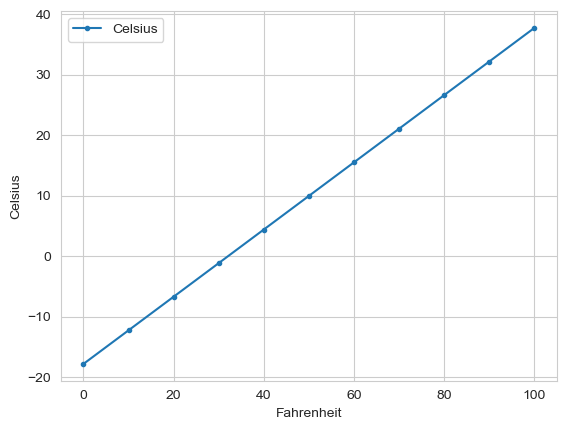

In [133]:
import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

#### Loading the Average High Temperatures into a DataFrame

In [134]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [135]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [136]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Cleaning the Data

In [137]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [138]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [139]:
nyc.Date.dtype

dtype('int64')

In [140]:
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


#### Calculating Basic Descriptive Statistics for the Dataset

In [141]:
pd.set_option('display.precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

#### Forecasting Future January Average High Temperatures

In [142]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

linear_regression.slope

0.014771361132966163

In [143]:
linear_regression.intercept

8.694993233674289

##### Predict the average Fahrenheit temperature for January 2019

In [144]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

##### Approximate average temperature for January 1890

In [145]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

#### Plotting the Average High Temperatures and a Regression Line

(10.0, 70.0)

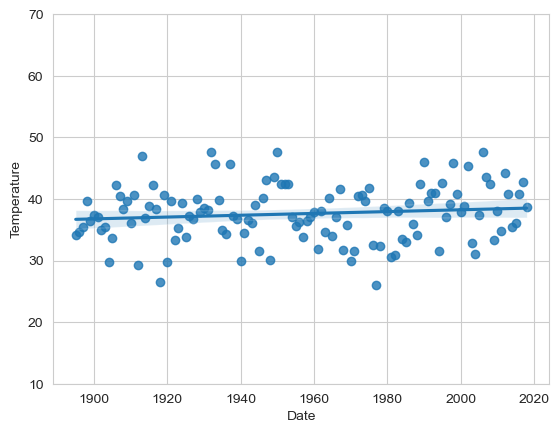

In [146]:
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10,70)

### 15.4 Case Study: Time Series and Simple Linear Regression

#### Splitting the Data for Training and Testing

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

In [148]:
X_train.shape

(93, 1)

In [149]:
X_test.shape

(31, 1)

#### Training the Model

In [150]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [151]:
linear_regression.coef_

array([0.01939167])

In [152]:
linear_regression.intercept_

-0.30779820252656265

#### Testing the Model

In [153]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]): 
                print(f'predicted: {p: .2f}, expected: {e: .2f}')

predicted:  37.86, expected:  31.70
predicted:  38.69, expected:  34.80
predicted:  37.00, expected:  39.40
predicted:  37.25, expected:  45.70
predicted:  38.05, expected:  32.30
predicted:  37.64, expected:  33.80
predicted:  36.94, expected:  39.70


#### Predicting Future Temperatures and Estimating Past Temperatures

In [154]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2019)

array([38.84399018])

In [155]:
predict(1890)

array([36.34246432])

#### Visualizing the Dataset with the Regression Line

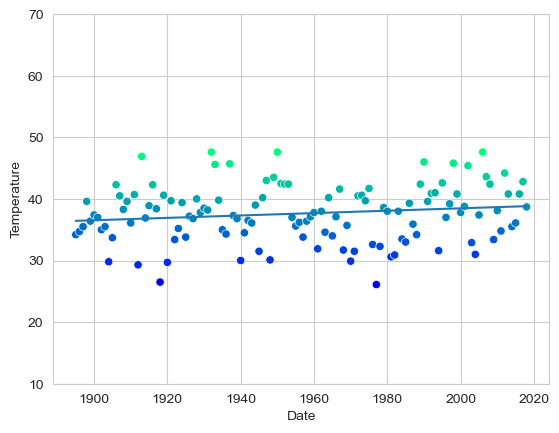

In [156]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y)

#### Method Comparison

The scipy.stats linregress function and sckit-learn estimator give similar results but the linregress function is the simpler method for simple linear regression. Sckit-learn offers more visulizations and options for both simple & multiple regression. 